In [ ]:
pip install spacy

In [ ]:
pip install stanza

In [ ]:
pip install imblearn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt

# visualizacion
import plotly.express as px

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from numpy import mean
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [ ]:
import spacy
from spacy import displacy
from spacy.lang.es.stop_words import STOP_WORDS

spacy.cli.download('es_core_news_md')
nlp = spacy.load('es_core_news_md')
stopwords_spacy = list(STOP_WORDS)

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [ ]:
# Remover comentarios a usuarios
def filter_reply(content):
    temp = content
    while temp.find("@") > -1:
        temp = temp[:temp.find("@")] + temp[(temp.find(" ",temp.find("@"))):]
    return temp

# Remover comentarios a usuarios
def filter_hashtag(content):
    temp = content
    while temp.find("#") > -1:
        temp = temp[:temp.find("#")] + temp[(temp.find(" ",temp.find("#"))):]
    return temp

#Constante de signos de puntuación (para referencia pues se eliminaron en el archivo fuente)
import string
puntua = string.punctuation + '¡¿'

# Quitar pronombres y stopwords
def text_data_cleaning(sentence):
    
    # Quitar comentarios
    sentence = filter_reply(sentence)
    # Quitar hashtag
    sentence = filter_hashtag(sentence)
    
    doc = nlp(sentence)
    
    tokens = []
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.strip()
        else:
            temp = token
        tokens.append(temp)
    
    clean_tokens = []
    for token in tokens:
        if token not in stopwords_spacy and token not in puntua:
            clean_tokens.append(token)
    
    return clean_tokens

def evaluate_model(model, x, y):
    tfidf = TfidfVectorizer(tokenizer = text_data_cleaning)
    classifier = model
    X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=.7, random_state=42, stratify=y)
    clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])
    scores = cross_val_score(clf, x, y, cv=10, scoring='accuracy')
    print(scores)
    print(np.mean(scores))
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_metrics(y_test, y_pred)
    
def print_metrics(y_test, y_pred):
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Negativo', 'Neutro', 'Positivo']) #.from_predictions(y_test, y_pred)
    disp.plot(cmap="Blues", values_format=',')
    #metricas
    print('Accuracy: ', round(accuracy_score(y_test, y_pred),2))
    print('f1_score: ', round(f1_score(y_test, y_pred, average='weighted'),2)) #round(tp / (tp + fp),2))
    print('Precision: ', round(precision_score(y_test, y_pred, average='weighted'),2)) #round(tp / (tp + fp),2))
    print('recall_score: ', round(recall_score(y_test, y_pred, average='weighted'),2)) #round(tp / (tp + fp),2))

In [ ]:
df = pd.read_excel('ComentariosInstagram.xlsx')
df.head()

,Texto,Etiquetado
0,@giomaeli muchas gracias 🙏🏻😊,Positivo
1,@alexisjosueh ¡Felicitaciones por este gran tr...,Positivo
2,"@alexisjosueh felicidades, excelente trabajo🙌🏻",Positivo
3,"@alexisjosueh felicitaciones, las fotografías ...",Positivo
4,Muchas gracias 🙏🏻♥️,Positivo


In [ ]:
y = df["Etiquetado"].replace({'Positivo': 1, 'Negativo': -1, 'Neutro': 0})
x = df["Texto"].fillna('')

# Prueba con Linear SVC

Accuracy:  0.77
f1_score:  0.77
Precision:  0.78
recall_score:  0.77


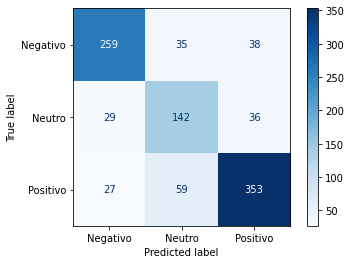

In [ ]:
model = LinearSVC()
tfidf = TfidfVectorizer(tokenizer = text_data_cleaning)
classifier = model
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=.7, random_state=42)
clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_metrics(y_test, y_pred)

In [ ]:
df_test = pd.DataFrame()
df_test['X_test'] = X_test
df_test['y_test'] = y_test
df_test['y_pred'] = y_pred
df_test['dif'] = y_test != y_pred
df_dif = df_test[df_test['dif'] == True]
df_dif.head(5)

,X_test,y_test,y_pred,dif
2247,Las bancas rojas😢,1,0,True
2063,Si voy a poder mi examen si he pagado y no he ...,1,-1,True
2059,con todo el sol asfddbnksdd,-1,0,True
2560,"Al fin, un poco de humanidad carajo!!! La educ...",0,-1,True
1135,"¿Para cuando Artes Escénicas en Monterrico?, :(",1,0,True


In [ ]:
hidden_layer_sizes = [(100, )]

In [ ]:
%%time
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {
    'clf__hidden_layer_sizes': hidden_layer_sizes
}

# Instantiate the logistic regression classifier: logreg
tfidf = TfidfVectorizer(tokenizer = text_data_cleaning)
classifier = MLPClassifier(random_state=0, max_iter=300, learning_rate = 'constant', alpha=0.05
                           , activation = 'logistic', solver='adam', verbose=True)
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=.7, random_state=42, stratify=y)
clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])

# Instantiate the GridSearchCV object: logreg_cv
model = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Fit it to the training data
model.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(model.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(model.best_score_))


Iteration 1, loss = 1.09283795
Iteration 2, loss = 1.06253921
Iteration 3, loss = 1.04695940
Iteration 4, loss = 1.03834246
Iteration 5, loss = 1.03097232
Iteration 6, loss = 1.02290865
Iteration 7, loss = 1.01648946
Iteration 8, loss = 1.00765199
Iteration 9, loss = 1.00034196
Iteration 10, loss = 0.99163917
Iteration 11, loss = 0.98400749
Iteration 12, loss = 0.97452464
Iteration 13, loss = 0.96548467
Iteration 14, loss = 0.95502775
Iteration 15, loss = 0.94588139
Iteration 16, loss = 0.93504456
Iteration 17, loss = 0.92377352
Iteration 18, loss = 0.91230076
Iteration 19, loss = 0.90046836
Iteration 20, loss = 0.88800851
Iteration 21, loss = 0.87582743
Iteration 22, loss = 0.86384443
Iteration 23, loss = 0.85163314
Iteration 24, loss = 0.83924557
Iteration 25, loss = 0.82788267
Iteration 26, loss = 0.81564217
Iteration 27, loss = 0.80509703
Iteration 28, loss = 0.79349960
Iteration 29, loss = 0.78274937
Iteration 30, loss = 0.77283963
Iteration 31, loss = 0.76276701
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



# Linear SVC

[0.78220859 0.77607362 0.76380368 0.78834356 0.78527607 0.79754601
 0.7208589  0.67177914 0.76380368 0.56      ]
0.7409693251533742
Accuracy:  0.77
f1_score:  0.77
Precision:  0.78
recall_score:  0.77


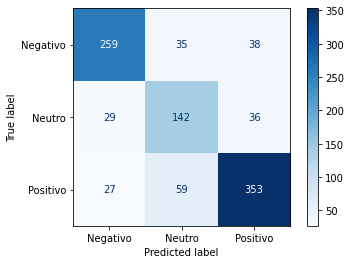

In [ ]:
model = LinearSVC()
evaluate_model(model, x, y)

# Naive Bayes

C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_ex

[0.75153374 0.7392638  0.7392638  0.75766871 0.79754601 0.74233129
 0.67484663 0.65030675 0.70858896 0.62153846]
0.7182888154789995


C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Accuracy:  0.76


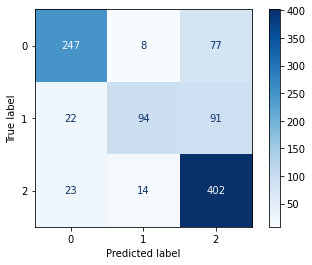

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
evaluate_model(model, x, y)

# Logistic Regression

C:\Users\Luis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sh

[0.78220859 0.76380368 0.71165644 0.76380368 0.76993865 0.75766871
 0.7392638  0.66871166 0.71779141 0.60307692]
0.7277923548843794


C:\Users\Luis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Accuracy:  0.77


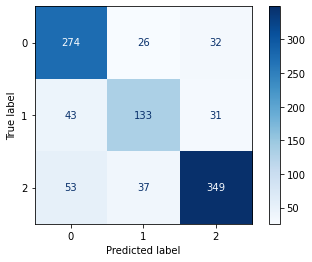

In [ ]:
model = LogisticRegression(random_state=0, C=100)
evaluate_model(model, x, y)

# máquinas de vectores de soporte

C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_ex

[0.76993865 0.73619632 0.72699387 0.76380368 0.75766871 0.76380368
 0.72392638 0.67177914 0.72699387 0.6       ]
0.7241104294478528


C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Accuracy:  0.77


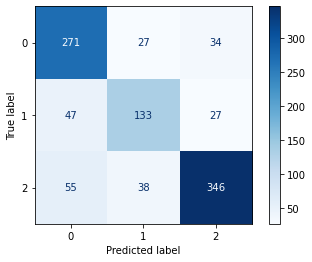

In [ ]:
model = SVC(C=501, gamma=0.1)
evaluate_model(model, x, y)

# árboles de decisión

C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_ex

[0.74846626 0.76687117 0.68711656 0.71165644 0.73619632 0.73006135
 0.7208589  0.68711656 0.6993865  0.60615385]
0.7093883907503541


C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Accuracy:  0.72


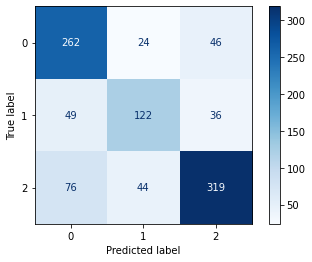

In [ ]:
model = DecisionTreeClassifier()
evaluate_model(model, x, y)

# Redes Neuronales

C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_ex

[0.77300613 0.7208589  0.70552147 0.76993865 0.76687117 0.76687117
 0.7392638  0.66257669 0.71779141 0.61230769]
0.723500707881076


C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Accuracy:  0.77


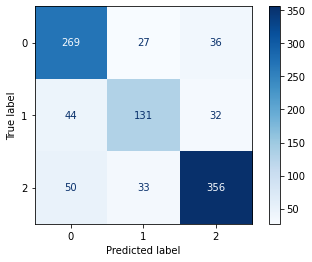

In [ ]:
model = MLPClassifier(random_state=1, max_iter=10)
evaluate_model(model, x, y)

C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_ex

[0.76993865 0.74539877 0.69325153 0.74539877 0.74233129 0.75766871
 0.72392638 0.69018405 0.68711656 0.58461538]
0.7139830108541764


C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Accuracy:  0.76


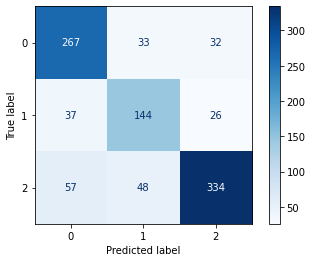

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(2,), max_iter=100, learning_rate_init=0.3, activation='logistic')
evaluate_model(model, x, y)

C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_ex

[0.73619632 0.73619632 0.70858896 0.74846626 0.7392638  0.72699387
 0.7392638  0.67791411 0.70245399 0.53846154]
0.7053798961774422


C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Accuracy:  0.73


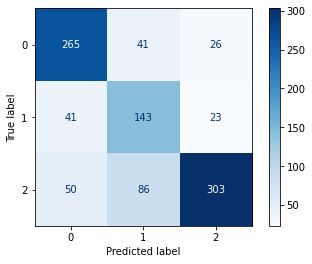

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(2,2), max_iter=100, learning_rate_init=0.3, activation='logistic')
evaluate_model(model, x, y)

C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_ex

[0.7607362  0.72699387 0.44785276 0.72699387 0.7392638  0.44478528
 0.69325153 0.67791411 0.68404908 0.56      ]
0.6461840490797546


C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Accuracy:  0.75


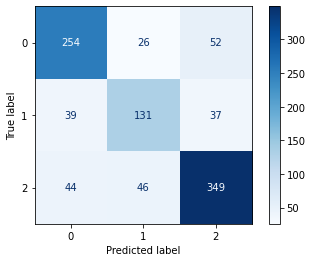

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(3,4,2), max_iter=100, learning_rate_init=0.3, activation='logistic')
evaluate_model(model, x, y)

C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_ex

[0.44785276 0.44785276 0.44785276 0.44785276 0.44785276 0.44478528
 0.44478528 0.44478528 0.44478528 0.44615385]
0.4464558754129307


C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Accuracy:  0.45


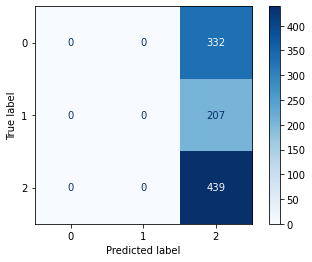

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(50,50,3), max_iter=100, learning_rate_init=0.3, activation='logistic')
evaluate_model(model, x, y)

C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_ex

[0.44785276 0.44785276 0.31595092 0.44785276 0.44785276 0.44478528
 0.44478528 0.44478528 0.44478528 0.44615385]
0.4332656913638509


C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Accuracy:  0.45


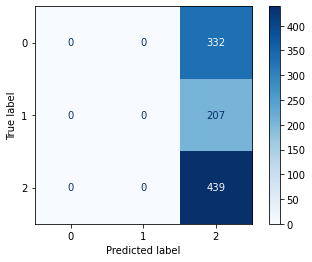

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(100,100,3), max_iter=300, learning_rate_init=0.3, activation='logistic')
evaluate_model(model, x, y)

C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_ex

[0.44785276 0.44785276 0.44785276 0.44785276 0.44785276 0.44478528
 0.44478528 0.44478528 0.44478528 0.44615385]
0.4464558754129307


C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Accuracy:  0.45


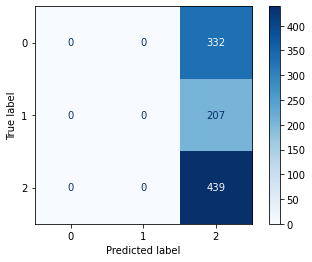

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(100,100,3), max_iter=300, learning_rate_init=0.3)
evaluate_model(model, x, y)

C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extrac

[0.79447853 0.44785276 0.72392638 0.72392638 0.78527607 0.74233129
 0.54601227 0.6595092  0.7208589  0.60307692]
0.6747248702218027


C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Accuracy:  0.76


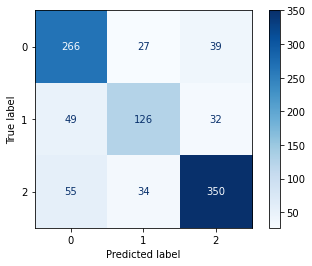

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(100,100,3), max_iter=300)
evaluate_model(model, x, y)

C:\Users\Luis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\neural_network\_mu

[0.6993865  0.72699387 0.70858896 0.7607362  0.50306748 0.75766871
 0.7208589  0.65644172 0.67791411 0.59076923]
0.6802425672487022


C:\Users\Luis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Accuracy:  0.68


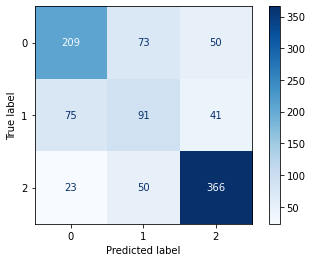

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(10,10,3), max_iter=200)
evaluate_model(model, x, y)

C:\Users\Luis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\neural_network\_mu

[0.76687117 0.73619632 0.71165644 0.54601227 0.79447853 0.44478528
 0.69631902 0.67177914 0.6809816  0.54461538]
0.6593695139216611


C:\Users\Luis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Accuracy:  0.74


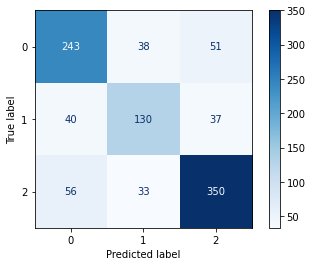

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(20,20,3), max_iter=100)
evaluate_model(model, x, y)

C:\Users\Luis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\neural_network\_mu

[0.68404908 0.74846626 0.6993865  0.44785276 0.74233129 0.76687117
 0.73619632 0.66257669 0.67177914 0.44615385]
0.6605663048607834


C:\Users\Luis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Accuracy:  0.73


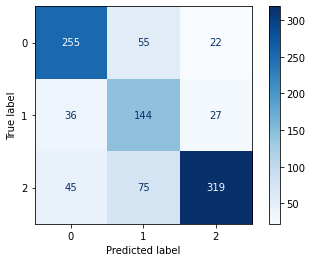

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(30,30,3), max_iter=100)
evaluate_model(model, x, y)

C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction

[0.44785276 0.71165644 0.6809816  0.78834356 0.77300613 0.62883436
 0.69631902 0.61349693 0.73619632 0.63384615]
0.6710533270410571


C:\Users\Luis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Accuracy:  0.78


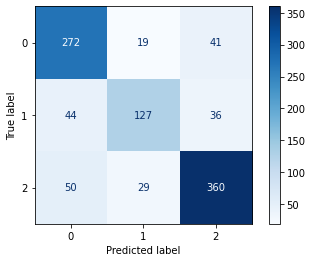

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(50,50,3), max_iter=100)
evaluate_model(model, x, y)

# Pruebas adicionales (No utilizado en Tarea Academica 3)

In [ ]:
model = SVC(C=501, gamma=0.1)
under = RandomUnderSampler(random_state=42, sampling_strategy=.5)
over = SMOTE(random_state=42, sampling_strategy='auto', k_neighbors=5)
# steps = [('u', under), ('o', over), ('model', model)]
steps = [('u', under), ('o', over), ('model', model)]
pipeline = Pipeline(steps=steps)

x = df_fraud.drop('fraud', axis=1)
y = df_fraud['fraud']
pipeline.fit(x, y)

y_pred = pipeline.predict(x)
print_metrics(y, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from numpy import mean
from imblearn.pipeline import Pipeline

model = SVC(C=501, gamma=0.1)
over = SMOTE(random_state=42, sampling_strategy='auto', k_neighbors=5)
under = RandomUnderSampler(random_state=42, sampling_strategy=.5)
steps = [('u', under), ('o', over), ('model', model)]
pipeline = Pipeline(steps=steps)

scores = cross_val_score(pipeline, x, y, scoring='precision', cv=10, n_jobs=-1)
score = mean(scores)
print('ROC AUC score for the combined sampling method: %.3f' % score)

In [ ]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
#c_space = np.logspace(-5, 8, 15)
c_space = np.logspace(0.1, 4, num=10) #np.logspace(2, 4, num=20)
gamma_space = np.arange(0.1, 1.1, 0.1)
param_grid = {'C': c_space, 'gamma': gamma_space}

# Instantiate the logistic regression classifier: logreg
logreg = SVC(random_state=0)
#.fit(X_train, y_train)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, scoring='precision')

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 501.18723362727246, 'gamma': 0.1}
Tuned Logistic Regression Accuracy: 0.9012973927381367
